# Parallel runs
A **static** graph in which nodes are run in parallel and results are aggregated by another node. 

* Voting pattern e.g., pick the best article 
* Subtasks - break the task into multiple tasks e.g., flight, hotel & car rental
* Distributed processing e.g., summarization task for a large corpus; "map-reduce" workflow where your graph invokes the same node multiple times in parallel with different states, before aggregating the results back into the main graph's state.


### References:
https://langchain-ai.github.io/langgraph/tutorials/workflows/?h=par#parallelization

* [Complex task decomposition](https://langchain-ai.github.io/langgraph/tutorials/workflows/?h=par#parallelization)
* [Orchestrator-Worker](https://langchain-ai.github.io/langgraph/tutorials/workflows/?h=par#orchestrator-worker)
* Voting

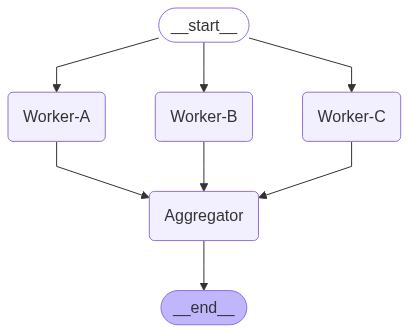

Processor generated: 3
Processor generated: 3
Processor generated: 3
----------------------------------
Parallel execution took : 3 secs
Sequential execution would have taken : 9 secs
Speed up by a factor of : 3


In [3]:
## Implementation of orchestrator-worker pattern
## 1. Launches 3 workers in parallel
## 2. Each worker:
##    - Generates a random number R
##    - Sleeps for R seconds 
## 3. State : {total of 3 numbers, list of 3 numbers}
## On invocation, prints the total time taken to execute the graph.


from langgraph.graph import StateGraph, START, END
from typing import List, Annotated, TypedDict
from IPython.display import Image, display
import random
import operator
import time

# Reducer function : appends the number to list[int]
def append_to_list(current: List[int], new: List[int])->List[int]:
    return current + new

# State schema
class StateParallel(TypedDict):
    total: int            # Total of all the generated numbers
    numbers: Annotated[List[int], append_to_list]   # Numbers generated by the nodes

# Worker nodes 
def worker_node(state: StateParallel)->StateParallel:
    rint = random.randint(1, 10)
    # Simulate artificial processing delays
    time.sleep(rint)
    print(f"Processor generated: {rint}")
    return {"numbers": [rint]}

def aggregator_node(state: StateParallel)->StateParallel:
    nums = state["numbers"]
    return {"total": sum(nums)}

# Graph
parallel_graph = StateGraph(StateParallel)

# Add nodes
parallel_graph.add_node("Worker-A", worker_node)
parallel_graph.add_node("Worker-B", worker_node)
parallel_graph.add_node("Worker-C", worker_node)
parallel_graph.add_node("Aggregator", aggregator_node)

# Add edges
parallel_graph.add_edge(START,"Worker-A")
parallel_graph.add_edge(START,"Worker-B")
parallel_graph.add_edge(START,"Worker-C")

parallel_graph.add_edge("Worker-A","Aggregator")
parallel_graph.add_edge("Worker-B","Aggregator")
parallel_graph.add_edge("Worker-C","Aggregator")

parallel_graph.add_edge("Aggregator",END)

# Compile
parallel_graph_compiled = parallel_graph.compile()

# Display
display(Image(parallel_graph_compiled.get_graph().draw_mermaid_png()))

# Invoke
start_time = time.time()
response = parallel_graph_compiled.invoke({"total": 0, "numbers": []})
end_time = time.time()

print("----------------------------------")
print(f"Parallel execution took : {int(end_time - start_time)} secs")
print(f"Sequential execution would have taken : {response["total"]} secs")
print(f"Speed up by a factor of : {round(response["total"] / int(end_time - start_time))}")